# Travel Recommendation System

Travel recommendation system utilizes users preferences and destination data to suggest personalized travel recommendations

## Importing  Packages

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Laoding Datasets

In [ ]:
tourism=pd.read_csv('tourism.csv')
rating=pd.read_csv('rating.csv')
user=pd.read_csv('user.csv')

In [ ]:
tourism.head()

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.5


In [ ]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
num_places = len(tourism['Place_Id'].unique())
print("Number of places in the dataset:", num_places)

num_users = len(user['User_Id'].unique())
print("Number of users:", num_users)

num_ratings = len(rating)
print("Total number of ratings:", num_ratings)

Number of places in the dataset: 437
Number of users: 300
Total number of ratings: 10000


In [ ]:
tourism.shape

(437, 6)

In [ ]:
rating.shape


(10000, 3)

In [ ]:
user.shape


(300, 3)

## Exploratory Data Analysis

In [ ]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Rating       437 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 20.6+ KB


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
tourism.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Rating         0
dtype: int64

In [ ]:
rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
user.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

## Data Preprocessing

In [ ]:
tourism_all = np.union1d(tourism['Place_Id'].unique(), rating['Place_Id'].unique())
total_tourism = len(tourism_all)
print("Total number of tourism:",total_tourism)

Total number of tourism: 437


## Deepcopy() of rating 

In [ ]:
all_tourism_rate = rating.copy()
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Merging two dataframes 

In [ ]:
all_tourism = pd.merge(all_tourism_rate,tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [ ]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


###Data Preparation

In [ ]:
all_tourism.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [ ]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [ ]:
prep = all_tourism.drop_duplicates(subset='Place_Id')
prep

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [ ]:
place_id, place_name, place_category, place_desc, place_city, city_category = prep[['Place_Id', 'Place_Name', 'Category', 'Description', 'City', 'city_category']].values.T.tolist()

In [ ]:
tourism_new = pd.DataFrame({
    "id": prep['Place_Id'],
    "name": prep['Place_Name'],
    "category": prep['Category'],
    "description": prep['Description'],
    "city": prep['City'],
    "city_category": prep['city_category']
})
tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
2008,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
2399,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
2448,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
2534,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


c:\Users\venkat mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


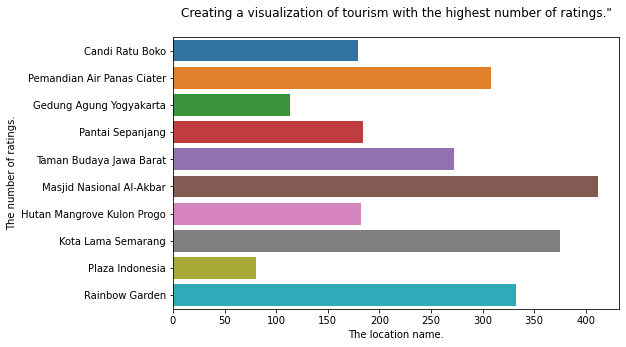

In [ ]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10,prep[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')
plt.figure(figsize=(8,5))
sns.barplot('Place_Id', 'Place_Name', data=top_10)
plt.title('Creating a visualization of tourism with the highest number of ratings."', pad=20)
plt.ylabel("The number of ratings.")
plt.xlabel("The location name.")
plt.show()

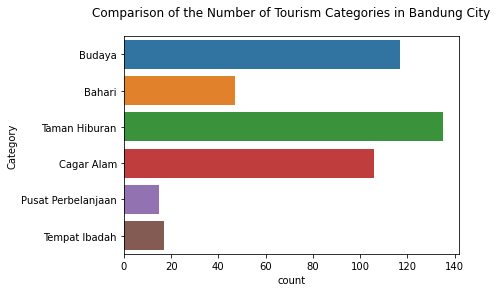

In [ ]:
sns.countplot(y='Category', data=prep)
plt.title('Comparison of the Number of Tourism Categories in Bandung City', pad=20)
plt.show()

c:\Users\venkat mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


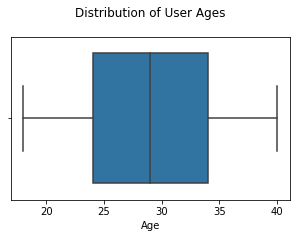

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribution of User Ages', pad=20)
plt.show()

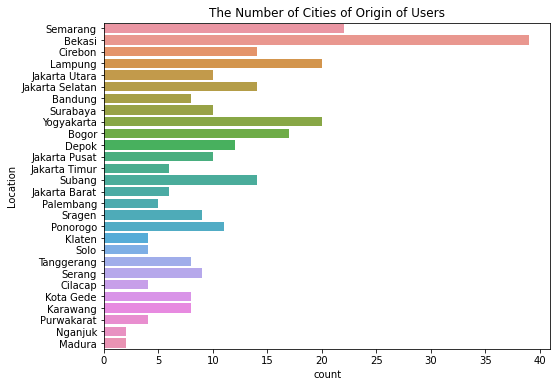

In [ ]:
City_of_Origin= user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=City_of_Origin)
plt.title('The Number of Cities of Origin of Users')
plt.show()

##Content Based Filtering

In [ ]:
ds = tourism_new
ds.sample(5)

,id,name,category,description,city,city_category
156,102,Monumen Batik Yogyakarta,Budaya,Perhatian pemerintah megenai kebudayan batik i...,Yogyakarta,Yogyakarta Budaya
662,315,Curug Luhur Waterfall,Cagar Alam,Sekitaran Bandung banyak sekali curug dari yan...,Bandung,Bandung Cagar Alam
17,292,Curug Anom,Cagar Alam,Curug Anom adalah sebuah air terjun yang memil...,Bandung,Bandung Cagar Alam
2918,140,Bendung Lepen,Taman Hiburan,Bendung Lepen sendiri dulunya merupakan salura...,Yogyakarta,Yogyakarta Taman Hiburan
420,340,Desa Wisata Lembah Kalipancur,Taman Hiburan,Wisata alam tengah menjadi sorotan bagi dunia ...,Semarang,Semarang Taman Hiburan


### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(ds['city_category'])
print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [ ]:
cv_matrix = cv.transform(ds['city_category']) 
cv_matrix.shape 

(437, 15)

### Converting Sparse mateix to dense matrix

In [ ]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [ ]:
df = pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index=ds['name']
)
df.sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Kota Lama Semarang,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Pantai Ancol,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Ocean Ecopark,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
Saloka Theme Park,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
Monumen Kapal Selam,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(cv_matrix)
cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim = pd.DataFrame(cosine,index=ds['name'],columns=ds['name'])
cosine_sim.sample(5,axis=1).sample(10,axis=0)

name,Kampoeng Rawa,Bumi Perkemahan Cibubur,Museum Geologi Bandung,Mall Thamrin City,De Mata Museum Jogja
name,,,,,
Monumen Bambu Runcing Surabaya,0.0,0.000000,0.500000,0.000000,0.500000
Heha Sky View,0.0,0.666667,0.000000,0.000000,0.408248
Pulau Pari,0.0,0.408248,0.000000,0.408248,0.000000
Jembatan Pasupati,0.0,0.666667,0.408248,0.000000,0.000000
Taman Jomblo,0.0,0.666667,0.408248,0.000000,0.000000
Watu Gunung Ungaran,1.0,0.000000,0.000000,0.000000,0.000000
Pantai Ngrenehan,0.0,0.000000,0.000000,0.000000,0.500000
Pantai Wediombo,0.0,0.000000,0.000000,0.000000,0.500000
Pantai Drini,0.0,0.000000,0.000000,0.000000,0.500000


### Recommendation 

In [ ]:
def tourism_recommendations(place_name,similarity_data=cosine_sim,items=ds[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore') 
    
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
tourism_recommendations("SnowBay Waterpark")

,name,category,description,city
0,Taman Impian Jaya Ancol,Taman Hiburan,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta
1,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta
2,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta
3,The Escape Hunt,Taman Hiburan,Escape Hunt adalah salah satu tempat rekreasi ...,Jakarta
4,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta


### Collaborative Filtering

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [ ]:
df = rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encoding

In [ ]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [ ]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [ ]:
num_users = len(user_to_user_encoded)
num_place = len(place_encoded_to_place)
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
min_rating = min(df['Place_Ratings'])
max_rating= max(df['Place_Ratings'])
print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [ ]:
x = df[['user','place']].values
y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values
train_indices = int(0.8 * df.shape[0])
x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


In [ ]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1]) 
    place_bias = self.place_bias(inputs[:, 1]) 
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) 

 

In [ ]:
model = RecommenderNet(num_users, num_place, 100)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100


1000/1000 [==============================] - 6s 4ms/step - loss: 0.6963 - root_mean_squared_error: 0.3474 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3479
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6879 - root_mean_squared_error: 0.3413 - val_loss: 0.6983 - val_root_mean_squared_error: 0.3485
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6821 - root_mean_squared_error: 0.3371 - val_loss: 0.6992 - val_root_mean_squared_error: 0.3490
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6810 - root_mean_squared_error: 0.3363 - val_loss: 0.6983 - val_root_mean_squared_error: 0.3484
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6740 - root_mean_squared_error: 0.3311 - val_loss: 0.7008 - val_root_mean_squared_error: 0.3500
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6712 - root_mean_squared_error: 0.3292 - val_loss: 0.7016 

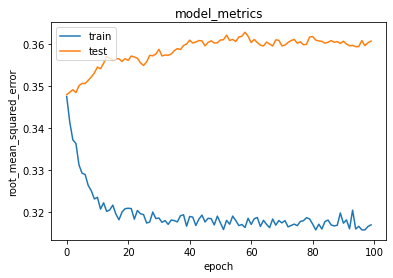

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
place_df = tourism_new
df = pd.read_csv('rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))

print('Place with high ratings from user :')

 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 157
Place with high ratings from user :


,id,name,category,description,city,city_category
73,227,Alun-Alun Kota Bandung,Taman Hiburan,Alun-alun Bandung adalah pusat kota Bandung ya...,Bandung,Bandung Taman Hiburan
142,368,Kampoeng Rawa,Cagar Alam,Kampoeng Rawa (disebut juga Kampung Rawa) adal...,Semarang,Semarang Cagar Alam
254,416,Keraton Surabaya,Budaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Surabaya,Surabaya Budaya
520,289,Curug Aseupan,Cagar Alam,Curug Aseupan berada di kawasan Curug Tilu Leu...,Bandung,Bandung Cagar Alam
561,112,Bukit Bintang Yogyakarta,Taman Hiburan,Bukit Bintang merupakan salah satu lokasi nong...,Yogyakarta,Yogyakarta Taman Hiburan


### Recommendation

In [ ]:
print('Top 10 place recommendation')
recommended= place_df[place_df['id'].isin(recommended_place_ids)]
recommended

Top 10 place recommendation


,id,name,category,description,city,city_category
45,407,Taman Ekspresi Dan Perpustakaan,Taman Hiburan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Surabaya,Surabaya Taman Hiburan
248,253,Selasar Sunaryo Art Space,Taman Hiburan,Selasar Sunaryo Art Space (SSAS) adalah sebuah...,Bandung,Bandung Taman Hiburan
389,396,Monumen Kapal Selam,Budaya,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Surabaya,Surabaya Budaya
471,132,Air Terjun Kedung Pedut,Cagar Alam,Air Terjun Kedung Pedut atau biasa disebut Cur...,Yogyakarta,Yogyakarta Cagar Alam
515,279,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Bandung Tempat Ibadah
837,263,Curug Batu Templek,Cagar Alam,Curug Batu Templek Bandung adalah sebuah wisat...,Bandung,Bandung Cagar Alam
865,401,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya,Surabaya Taman Hiburan
1128,254,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung,Bandung Taman Hiburan
1133,117,The World Landmarks - Merapi Park Yogyakarta,Taman Hiburan,Merapi Park merupakan salah satu tempat wisata...,Yogyakarta,Yogyakarta Taman Hiburan
1379,387,Obyek Wisata Goa Kreo,Cagar Alam,Goa Kreo Semarang yang berada di ibukota Jawa ...,Semarang,Semarang Cagar Alam


# Saving Model

In [ ]:
import joblib

In [ ]:
joblib.dump(cosine_sim,'COSINE_SIMILARITY.pkl')

['COSINE_SIMILARITY.pkl']

In [ ]:
items=ds[['name','category','description','city']]

In [ ]:
joblib.dump(items,'DATA_ITEMS.pkl')

['DATA_ITEMS.pkl']

In [ ]:
import joblib
import pandas as pd
cosine=joblib.load('COSINE_SIMILARITY.pkl')
item=joblib.load('DATA_ITEMS.pkl')
def tourism_recommendations(place_name):
    try:
        k=5
        similarity_data=cosine
        items=item
        index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        closest = closest.drop(place_name,errors='ignore')
        df=pd.DataFrame(closest).merge(items).head(k)
        return df
    except KeyError:
        return "Sorry!No data found"



In [ ]:
input_data=input("Enter the location:")
print(input_data)
tourism_recommendations(input_data)


SnowBay Waterpark


,name,category,description,city
0,Taman Impian Jaya Ancol,Taman Hiburan,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta
1,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta
2,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta
3,The Escape Hunt,Taman Hiburan,Escape Hunt adalah salah satu tempat rekreasi ...,Jakarta
4,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta


In [ ]:
input_data=input("Enter the location:")
print(input_data)
tourism_recommendations(input_data)

Kerela


'Sorry!No data found'